In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Age'].isnull().sum()

177

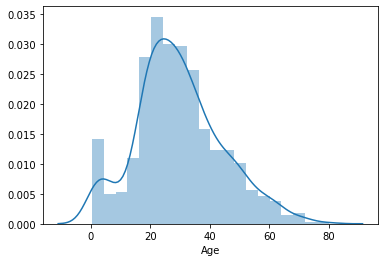

In [5]:
sns.distplot(df['Age'].dropna())

In [5]:
# Adding a outliers ex filling na with 100 in df.Age
#sns.distplot(df["Age"].fillna(100))

If the data is guassian distributed then we peform extream value analysis. 
##### Working on Guassian Distribution

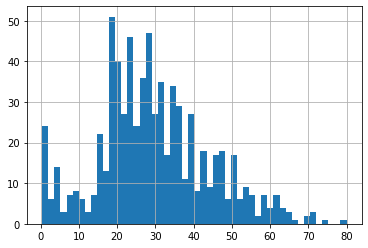

In [6]:
df["Age"].hist(bins=50)

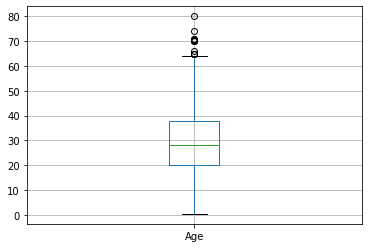

In [7]:
df.boxplot(column='Age')

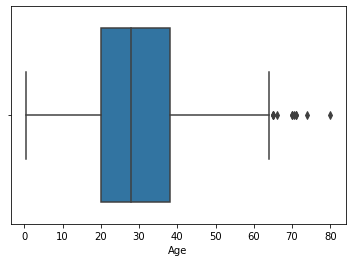

In [8]:
sns.boxplot("Age",data=df)

In [8]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
# Assumption(that Age column is symmentry--guassian distribution)
up_bound=df['Age'].mean()+3*df['Age'].std()
lw_bound=df['Age'].mean()-3*df['Age'].std()
print(up_bound)
print(lw_bound)

73.27860964406095
-13.88037434994331


##### data distribution is skewed(not symentry)

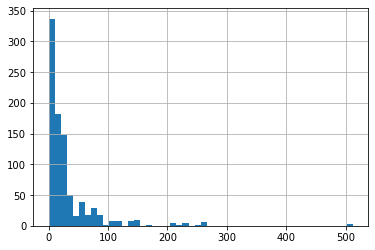

In [10]:
df['Fare'].hist(bins=50)

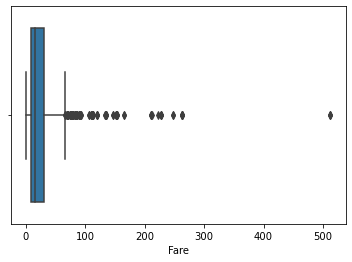

In [11]:
sns.boxplot("Fare",data=df)

In [12]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [13]:
# CAlculating IQR for Fare column to calculate the boundaries
IQR=df['Fare'].quantile(0.75)-df['Fare'].quantile(0.25)
IQR

23.0896

In [14]:
lw_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
up_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lw_bridge)
print(up_bridge)

-26.724
65.6344


In [15]:
# VAlues based on extream boundaries---- EXTREAM outliers
lw_bridge=df['Fare'].quantile(0.25)-(IQR*3)
up_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lw_bridge)
print(up_bridge)

-61.358399999999996
100.2688


In [18]:
df1=df.copy()

In [19]:
df1.loc[df['Age']>=73,'Age']=73


In [20]:
df1.loc[df['Fare']>=100,'Fare']=100


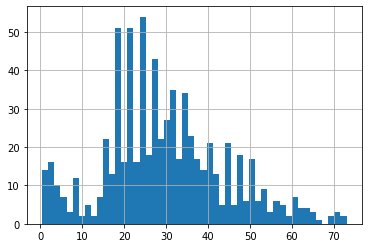

In [21]:
df1['Age'].hist(bins=50)

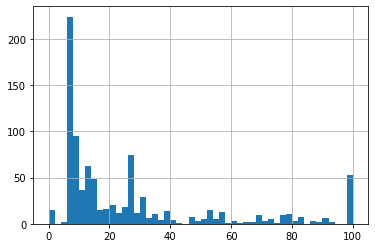

In [22]:
df1['Fare'].hist(bins=50)

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df1[['Age','Fare']].fillna(0),df1['Survived'],
                                               test_size=0.2,random_state=34)

In [24]:
## Linear regression 
from sklearn.linear_model import LogisticRegression
classif=LogisticRegression()
classif.fit(x_train,y_train)
y_prediction=classif.predict(x_test)
y_prediction1=classif.predict_proba(x_test)

In [25]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
print(confusion_matrix(y_test,y_prediction))
print(accuracy_score(y_test,y_prediction))
print(roc_auc_score(y_test,y_prediction1[:,-1]))

[[104  14]
 [ 35  26]]
0.7262569832402235
0.7489580439010837


In [26]:
## RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classif=RandomForestClassifier()
classif.fit(x_train,y_train)
y_prediction=classif.predict(x_test)
y_prediction1=classif.predict_proba(x_test)

In [27]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
print(confusion_matrix(y_test,y_prediction))
print(accuracy_score(y_test,y_prediction))
print(roc_auc_score(y_test,y_prediction1[:,-1]))

[[94 24]
 [27 34]]
0.7150837988826816
0.7531953320366769
